<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/question_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import random


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the CSV file



In [ ]:
df = pd.read_csv("/content/avocado.csv")

# Check the columns in dataframe

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Parse Date column and make the date as index

In [ ]:
df = pd.read_csv("/content/avocado.csv", parse_dates=['Date'], index_col='Date')

# Remove unnecessary column


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


# Create new feature Total Price
Total Price = Total Volume * AveragePrice





In [ ]:
df['TotalPrice'] = df['Total Volume'] * df['AveragePrice']

In [ ]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,TotalPrice
Date,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


# Check and fill the null values (IF ANY)

- Rolling Average

- Backword / Forward *Fill*

In [ ]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
TotalPrice      0
dtype: int64

# Print and check the dates

In [ ]:
df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=18249, freq=None)

In [ ]:
period = df.index.nunique()
period

169

In [ ]:
pd.date_range('2007-01-01', freq='MS', periods=period)

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', length=169, freq='MS')

In [ ]:
df.value_counts()

AveragePrice  Total Volume  4046        4225        4770     Total Bags  Small Bags  Large Bags  XLarge Bags  type          year  region               TotalPrice  
3.25          16700.94      2325.93     11142.85    0.00     3232.16     3232.16     0.00        0.00         organic       2016  SanFrancisco         5.427805e+04    1
1.18          2208596.12    1051836.46  479599.90   7659.28  669500.48   562989.08   106461.22   50.18        conventional  2018  Plains               2.606143e+06    1
              1102213.13    129351.87   659069.49   4321.42  309470.35   304382.22   5088.13     0.00         conventional  2018  BaltimoreWashington  1.300611e+06    1
              1192210.54    16098.34    913022.98   801.09   262288.13   214317.49   47970.64    0.00         conventional  2015  NewYork              1.406808e+06    1
              1338129.89    19919.91    1025372.06  2849.43  289988.49   228539.44   61449.05    0.00         conventional  2015  NewYork              1.578993e

# Create Time Series
Features: Date, Total Price

Take by region = TotalUS   

In [ ]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
df1 = df.loc[(df['region']=='TotalUS')].reset_index()
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,TotalPrice
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,2.593308e+07
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,2.458197e+07
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,2.607844e+07
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,2.563235e+07
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,2.239182e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS,2.118566e+06
334,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS,2.152536e+06
335,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS,2.092900e+06
336,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS,2.347875e+06


In [ ]:
ts = df1[['Date', 'TotalPrice']]
ts

,Date,TotalPrice
0,2015-12-27,2.593308e+07
1,2015-12-20,2.458197e+07
2,2015-12-13,2.607844e+07
3,2015-12-06,2.563235e+07
4,2015-11-29,2.239182e+07
...,...,...
333,2018-02-04,2.118566e+06
334,2018-01-28,2.152536e+06
335,2018-01-21,2.092900e+06
336,2018-01-14,2.347875e+06


# Vizualize the TS

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Decompose TS & Vizualize Components of TS

In [ ]:
# Multiplicative Decomposition 

result_mul = seasonal_decompose(ts['TotalPrice'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(ts['TotalPrice'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

AttributeError: ignored

# Check the Stationarity

In [ ]:
random.seed(7)
#Augmented Dickey–Fuller test / ADF Test
result = adfuller(ts.TotalPrice.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9696861650307085
p-value: 0.30002074281127333
Critial Values:
   1%, -3.4936021509366793
Critial Values:
   5%, -2.8892174239808703
Critial Values:
   10%, -2.58153320754717


### Conclusion of ADF test :: TS is non stationary

# Make the TS Stationary

####  use atleast 3 methods for making the TS stationary 

Then check the stationarity of TS using ADF test



In [ ]:
ts['RA'] = ts.TotalPrice.rolling(12,min_periods=2).mean()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc6175be8d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6175be8d0>)

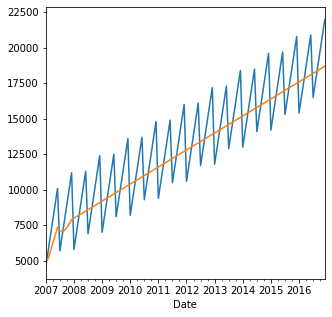

In [ ]:
ts['TotalPrice'].plot(),ts['RA'].plot()

In [ ]:
ts['RA_detrend'] = ts.TotalPrice - ts.RA

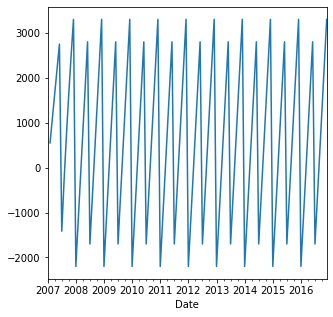

In [ ]:
ts.RA_detrend.plot()

In [ ]:
ts['RA_detrend'].head()

Date
2007-01-01       NaN
2007-02-01     550.0
2007-03-01    1100.0
2007-04-01    1650.0
2007-05-01    2200.0
Name: RA_detrend, dtype: float64

In [ ]:
random.seed(7)
#Augmented Dickey–Fuller test / ADF Test
result = adfuller(ts.TotalPrice.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.339525450161846
p-value: 3.2040791239779225e-13
Critial Values:
   1%, -3.4942202045135513
Critial Values:
   5%, -2.889485291005291
Critial Values:
   10%, -2.5816762131519275


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def ts_train_test_split(X, per=0.90):
    size = int(len(X) * per)
    train, test = X[0:size], X[size:len(X)]
    return train,test

In [ ]:
train,test = ts_train_test_split(ts.loc['2015-12-27':,'RA_detrend'],per=0.70)

In [ ]:
len(train),len(test)

(83, 36)

In [ ]:
# for 
model = ARIMA(train, order=(2,1,1)) # order is p,d,q
model_fit = model.fit()
output = model_fit.predict(start=,end=118,dynamic=True)
print("RMSE is = ", mean_squared_error(test,output)**0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

RMSE is =  1781.9434500258253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
output_1 = model_fit.forecast(len(test))
print("RMSE is = ", mean_squared_error(test,output_1[0])**0.5)

RMSE is =  1705.8248611943504


In [ ]:
print('expected=',test)

expected= Date
2014-01-01   -2200.0
2014-02-01   -1200.0
2014-03-01    -200.0
2014-04-01     800.0
2014-05-01    1800.0
2014-06-01    2800.0
2014-07-01   -1700.0
2014-08-01    -700.0
2014-09-01     300.0
2014-10-01    1300.0
2014-11-01    2300.0
2014-12-01    3300.0
2015-01-01   -2200.0
2015-02-01   -1200.0
2015-03-01    -200.0
2015-04-01     800.0
2015-05-01    1800.0
2015-06-01    2800.0
2015-07-01   -1700.0
2015-08-01    -700.0
2015-09-01     300.0
2015-10-01    1300.0
2015-11-01    2300.0
2015-12-01    3300.0
2016-01-01   -2200.0
2016-02-01   -1200.0
2016-03-01    -200.0
2016-04-01     800.0
2016-05-01    1800.0
2016-06-01    2800.0
2016-07-01   -1700.0
2016-08-01    -700.0
2016-09-01     300.0
2016-10-01    1300.0
2016-11-01    2300.0
2016-12-01    3300.0
Name: RA_detrend, dtype: float64


In [ ]:
print('predicted=',output)

predicted= 2014-01-01    -725.946488
2014-02-01    -845.765062
2014-03-01    -531.070119
2014-04-01     -26.973021
2014-05-01    1145.934084
2014-06-01    1725.970466
2014-07-01     672.381291
2014-08-01     717.958684
2014-09-01     636.338566
2014-10-01     639.919161
2014-11-01     633.596130
2014-12-01     633.877369
2015-01-01     633.387528
2015-02-01     633.409613
2015-03-01     633.371666
2015-04-01     633.373400
2015-05-01     633.370460
2015-06-01     633.370596
2015-07-01     633.370368
2015-08-01     633.370379
2015-09-01     633.370361
2015-10-01     633.370362
2015-11-01     633.370361
2015-12-01     633.370361
2016-01-01     633.370361
2016-02-01     633.370361
2016-03-01     633.370361
2016-04-01     633.370361
2016-05-01     633.370361
2016-06-01     633.370361
2016-07-01     633.370361
2016-08-01     633.370361
2016-09-01     633.370361
2016-10-01     633.370361
2016-11-01     633.370361
2016-12-01     633.370361
Freq: MS, dtype: float64


In [ ]:
len(output_1), len(output_1[0])

(3, 36)

In [ ]:
output_1

(array([-725.94648837, -845.76506223, -531.0701192 ,  -26.9730212 ,
        1145.93408394, 1725.97046638,  672.38129059,  717.95868393,
         636.33856564,  639.91916096,  633.59613047,  633.87736912,
         633.38752774,  633.40961344,  633.37166554,  633.37339961,
         633.37045978,  633.3705959 ,  633.37036815,  633.37037884,
         633.37036119,  633.37036203,  633.37036066,  633.37036073,
         633.37036062,  633.37036063,  633.37036062,  633.37036062,
         633.37036062,  633.37036062,  633.37036062,  633.37036062,
         633.37036062,  633.37036062,  633.37036062,  633.37036062]),
 array([ 870.38667836,  877.81427851,  936.16468479, 1027.3079761 ,
        1127.74232302, 1127.8034299 , 1382.36410099, 1382.36416167,
        1383.74954214, 1383.74954216, 1383.7578464 , 1383.7578464 ,
        1383.7578962 , 1383.7578962 , 1383.7578965 , 1383.7578965 ,
        1383.7578965 , 1383.7578965 , 1383.7578965 , 1383.7578965 ,
        1383.7578965 , 1383.7578965 , 1383.757

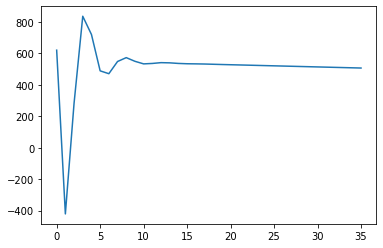

In [ ]:
plt.plot(output_1[0])

# Auot ARIMA

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 27.1MB/s 
     |████████████████████████████████| 9.5MB 39.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Sample Example of Auto ARIMA

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Apply AUTO ARIMA to Sales Data

In [ ]:
y = df.Sales.values
# y = df.RA_detrend.values[1:]

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Performing stepwise search to minimize aic
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=1434.795, Time=4.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1497.871, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1497.256, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1496.287, Time=0.08 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1453.496, Time=3.19 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1430.503, Time=2.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1454.459, Time=2.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=1301.187, Time=2.78 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1312.285, Time=3.44 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1324.503, Time=1.65 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0] intercept
Total fit time: 31.004 seconds


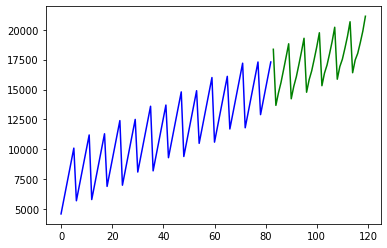

In [ ]:
train, test = train_test_split(y, train_size=83)

# Fit your model
model = pm.auto_arima(train, start_p=4,start_q=4,seasonal=True, trace = True) #seasonal =False

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)

x = np.arange(y.shape[0])
plt.plot(x[:83], train, c='blue')
plt.plot(x[83:], forecasts, c='green')
plt.show()

### Sequential Split for Time series Forecasting

In [ ]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [ ]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))#5,1,0 #5,1,1, 4,1,0, 2,1,0
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=207.311437, expected=171.660000
predicted=170.531283, expected=165.000000
predicted=166.928452, expected=173.490000
predicted=174.312190, expected=171.760000
predicted=170.975496, expected=180.950000
predicted=181.388608, expected=184.460000
predicted=183.900448, expected=180.290000
predicted=179.825158, expected=182.660000
predicted=183.026951, expected=176.730000
predicted=176.291360, expected=171.510000
predicted=171.685876, expected=174.240000
predicted=174.683504, expected=174.940000
predicted=174.716111, expected=179.730000
predicted=179.825016, expected=178.370000
predicted=177.924363, expected=190.000000
predicted=190.506600, expected=190.500000
predicted=189.687626, expected=188.390000
predicted=188.253506, expected=193.900000
predicted=194.236358, expected=191.630000
predicted=191.145974, expected=199.000000
predicted=199.401834, expected=205.550000
predicted=205.297295, expected=209.980000
predicted=209.734456, expected=205.970000
predicted=205.526468, expected=201

## NOTE of CAUTION ::

Trying out different values of p,d,q may sometime give value errors / non stationarity errors / overflow warnings , etc.

In that case use different the p,d,q values 

### Sample Value Error message ::


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# Hints For checking p,d,q values

- If TS is stationary d=0

- If TS is non-stationary d=1 (99%)

- Atleast find 2 p,d,q combinations and compare their RMSE

- Try out AUTO ARIMA

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31.973


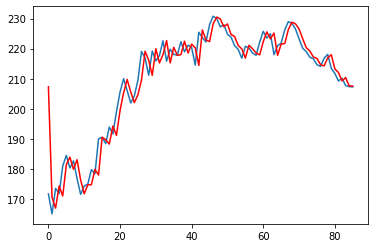

In [ ]:
# plot
pyplot.plot(test.values)
pyplot.plot(predictions, color='red')
# pyplot.show()